In [1]:
from IPython.display import display, clear_output
import keyboard
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12, 7], 
    "figure.dpi": 300 
})


#### Definimos t($\omega$): 
$$t(\omega)=\frac{-\kappa}{(\Omega-\omega)-i\kappa-i\frac{g^2}{i(\Delta E-\omega)+\gamma}}$$

In [2]:
def t_w (w, k, Omega, DeltaE, gamma, g):
    numerador = -k
    denominador = (Omega-w) - 1j * k - 1j * g**2 / (1j * (DeltaE - w) + gamma)
    t = numerador / denominador
    return abs(t)

Si jugamos con la función, llegamos a:

$$
t(\omega)=\frac{-\kappa\left[(\Delta E-\omega)-i\gamma\right]}{\left[(\Omega-\omega)(\Delta E-\omega)-\kappa\gamma-g^2\right]-i\left[(\Omega-\omega)\gamma+(\Delta E-\omega)\kappa\right]}
$$

Sacamos los polos de la parte real del denominador, obteniendo:
$$
\omega_1=\frac{(\Delta E+\Omega)+\sqrt{(\Delta E-\Omega)^2+4(\kappa\gamma+g^2)}}{2}
$$
$$
\omega_2=\frac{(\Delta E+\Omega)-\sqrt{(\Delta E-\Omega)^2+4(\kappa\gamma+g^2)}}{2}
$$
Si queremos el valor de g: 
$$g=\frac{\sqrt{|\omega_1-\omega_2|^2-(\Omega-\Delta E)^2-4\kappa\gamma}}{2}$$

Junto a las curvas, dibujaremos líneas verticales correspondientes a esos polos

In [3]:
def w_1(k, Omega, DeltaE, gamma, g):
    return 0.5 * ((DeltaE + Omega) + np.sqrt((DeltaE - Omega)**2 + 4*(k * gamma + g**2)))

def w_2(k, Omega, DeltaE, gamma, g):
    return 0.5 * ((DeltaE + Omega) - np.sqrt((DeltaE - Omega)**2 + 4*(k * gamma + g**2)))

 # With noise


## Creamos base de datos

In [4]:
# Definimos una función que genere la base de datos
def Parameters_generator (num_datos):
    k = np.random.uniform(1e-4, 1e-2, num_datos)
    DeltaE = np.random.uniform(0.5, 1.5, num_datos)
    gamma = np.random.uniform(1e-4, 1e-2, num_datos)
    g = np.random.uniform(1e-4, 1e-2, num_datos)

    return k, DeltaE, gamma, g

def gauss_noise (data, sig):
    return data + np.random.normal(0,sig)

num_datos = 10000

In [5]:
# #Creamos base de datos y guardamos en .txt
# k, DeltaE, gamma, g = Parameters_generator (num_datos)
# np.savetxt('Parameters_Noise.txt', np.column_stack((k, DeltaE, gamma, g)),
#             header='\u03BA \u0394E \u213D g', encoding='utf8') 

In [6]:
datos = np.loadtxt('Parameters_Noise.txt', skiprows=1)
k = datos[:,0]
DeltaE = datos[:,1]
gamma = datos[:,2]
g = datos[:,3]
Omega = 1

#Creamos los valores de y (la función t(w)) con nuestra base de datos
w_values = np.linspace(0.85, 1.15, 2500)

# Crear una matriz para almacenar los t(w)
t_values = np.zeros((num_datos, len(w_values)))
t_values_noise = np.zeros((num_datos, len(w_values)))

# w1 = w2 = np.zeros(num_datos)
# w1=w_1(k, Omega, DeltaE, gamma, g)
# w2=w_2(k, Omega, DeltaE, gamma, g)

# Almacenar los resultados en la matriz 
# (elemento [i,j] fila i es el número de combinación de [k, DeltaE, gamma, g] 
# y la comluna j el elemento de w_values)
for i in range (num_datos):
    t_values[i,:] = t_w(w_values, k[i], Omega, DeltaE[i], gamma[i], g[i]) 

for i in range (num_datos):
    t_values_noise[i,:] = [gauss_noise(t_values[i,j], 0.25*t_values[i,j]*np.random.rand())
                            for j in range(len(w_values))]


### Dibujamos las curvas

In [7]:
# plt.rcParams.update({
#     "text.usetex": False,
#     "figure.figsize": [8,6], 
# })

# i=0
# while i<=num_datos:
#     plt.clf()  # Limpia la figura antes de cada iteración
#     plt.plot(w_values, t_values_noise[i,:], label='Con ruido', color='blue')
#     plt.plot(w_values, t_values[i,:], label='Original', color='gold')
#     plt.title(f"Curva número: {i}")
#     plt.xlabel(r"$\omega$")
#     plt.ylabel(r"t ($\omega$)")
#     plt.legend()
#     plt.ylim(0) 
#     plt.xlim(0.85, 1.15) 

#     # # Calcula los valores de t(w) en w1 y w2
#     # t_w1 = t_w(w1[i], k[i], Omega, DeltaE[i], gamma[i], g[i])
#     # t_w2 = t_w(w2[i], k[i], Omega, DeltaE[i], gamma[i], g[i])

#     # if w_values.min() <= w1[i] <= w_values.max():
#     #     plt.vlines(w1[i], 0, t_w1, colors='black', linewidth=0.5)
#     # if w_values.min() <= w2[i] <= w_values.max():
#     #     plt.vlines(w2[i], 0, t_w2, colors='black', linewidth=0.5)

#     plt.draw()  # Dibuja la figura actual

#     plt.draw()  # Dibuja la figura actual

#     # Muestra la figura y espera a que el usuario presione Enter
#     display(plt.gcf())
#     clear_output(wait=True)
    
#     if keyboard.is_pressed('esc'): break
#     if keyboard.is_pressed('right'): i += 1
#     if keyboard.is_pressed('left'): 
#         i -= 1       
#         if i < 0:
#             i += 1

### Dibujos para Memoria

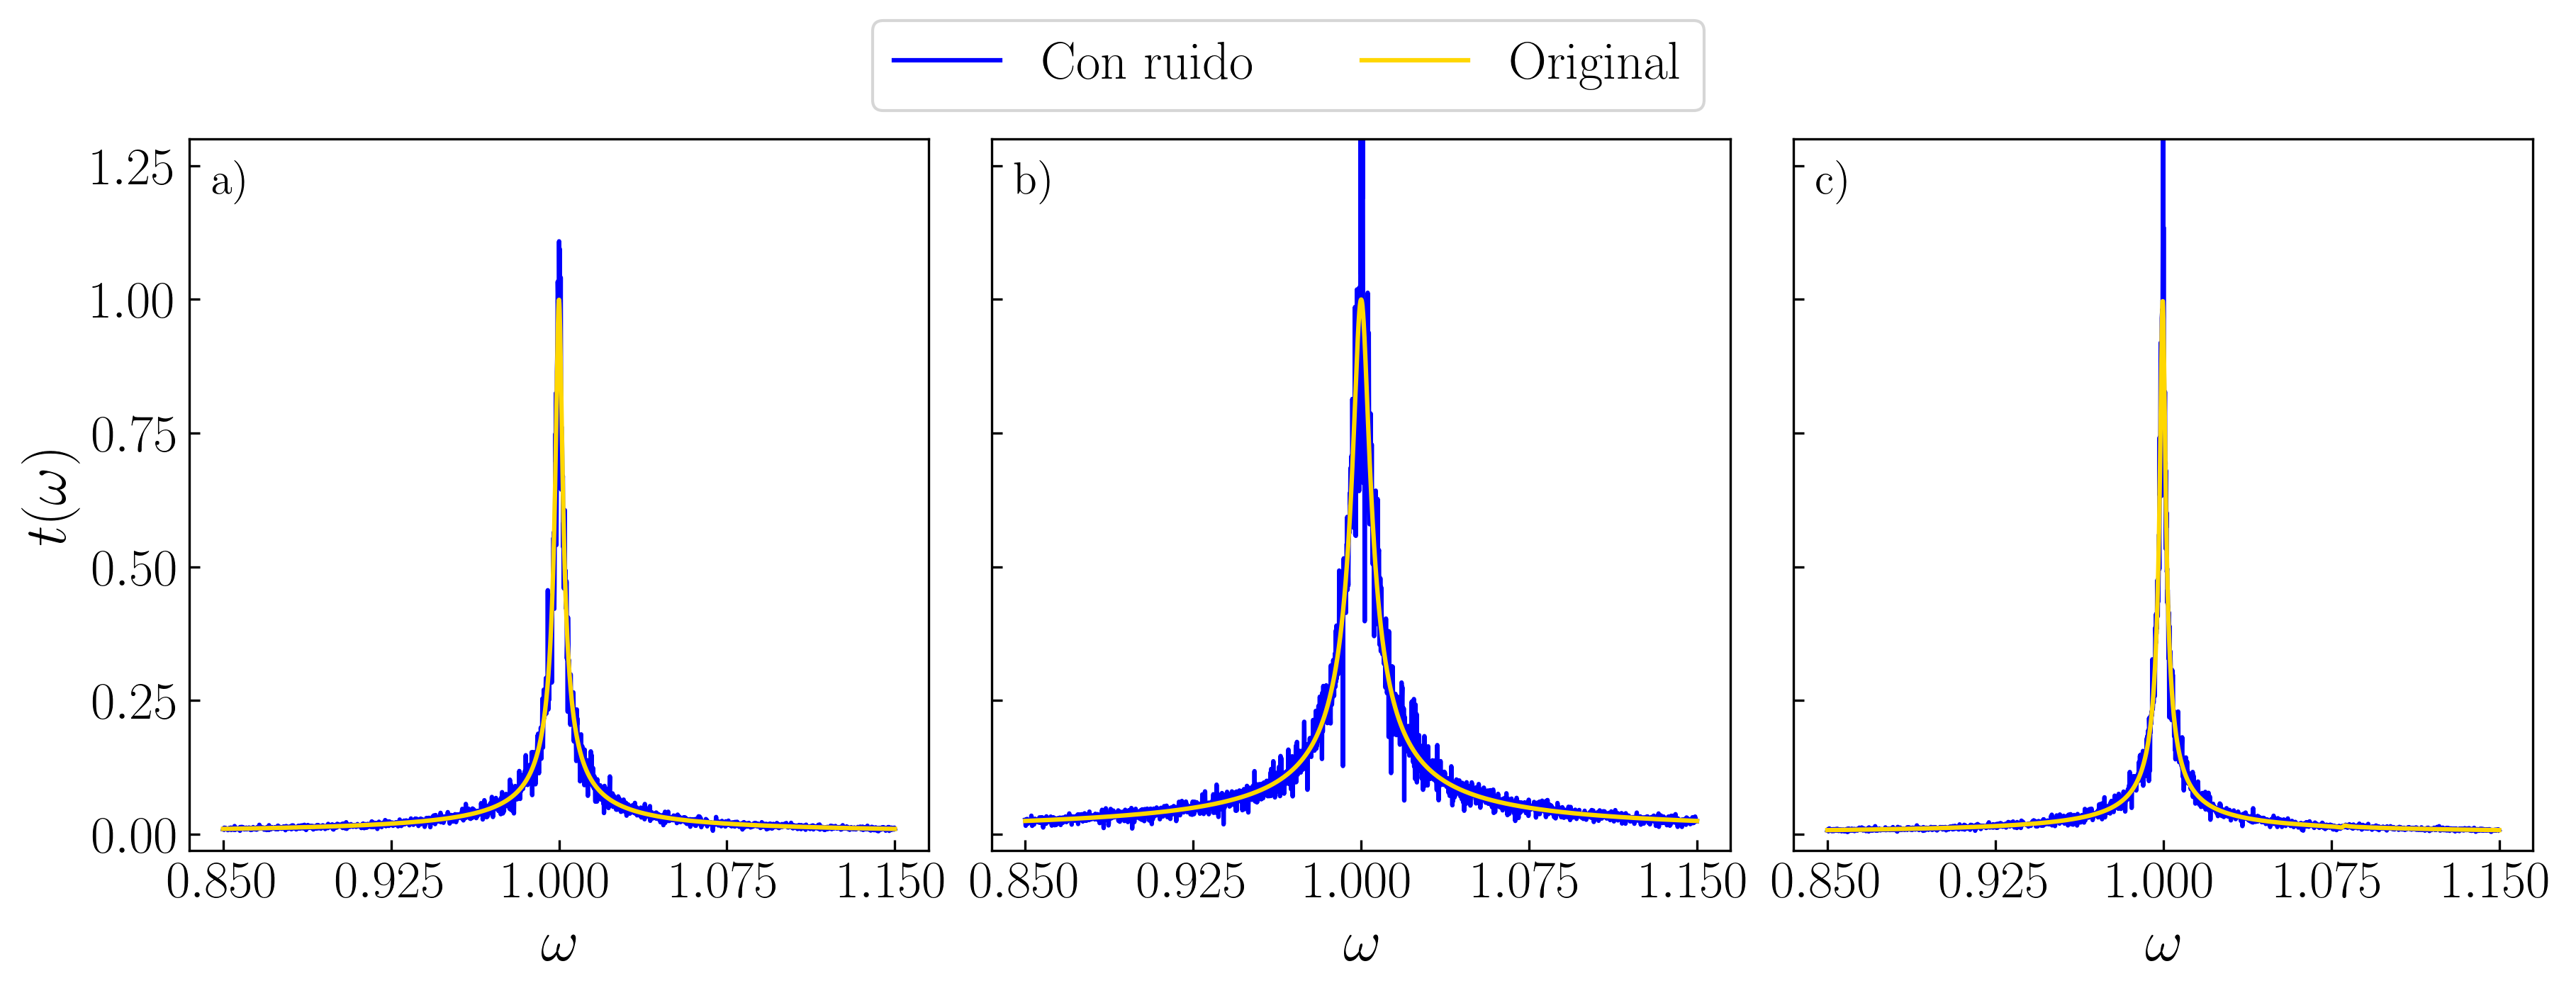

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12, 4], 
    "figure.dpi": 300 
})


pics = [0,8,19] 
labels_subplots = ["a)", "b)", "c)"]

fig, axes = plt.subplots(1, 3, constrained_layout=True)
for idx, (ax, i) in enumerate(zip(axes.flat, pics)):
    ax.plot(w_values, t_values_noise[i, :], color="b")
    ax.plot(w_values, t_values[i, :], color='gold')
    ax.set_yticks(np.arange(0, 1.3, 0.25))
    ax.set_xticks(np.linspace(w_values.min(), w_values.max(), 5))
    ax.set_ylim(-0.03, 1.3)

    ax.text(0.03, 0.97, labels_subplots[idx], transform=ax.transAxes, 
        fontsize=15, fontweight='bold', va='top', ha='left')

    # Configurar etiquetas y ticks según la posición del subplot
    if idx % 3 == 0:  # Primera columna
        ax.set_ylabel(r'$t(\omega)$')  # Etiqueta y en la columna izquierda
            
    else:
        ax.set_yticklabels([])  # Sin etiquetas en el eje y en la columna derecha
        ax.tick_params(axis='y', labelleft=False)

    ax.set_xlabel(r'$\omega$')

    # if idx // 2 == 1:  # Última fila
    #     ax.set_xlabel(r'$\omega$')  # Etiqueta x en la fila inferior
    # else:
    #     ax.set_xticklabels([])  # Sin etiquetas en el eje x en la fila superior
    #     ax.tick_params(axis='x', labelbottom=False)

    ax.tick_params(axis='both', direction='in')


labels = ["Con ruido", "Original"]
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=2)
plt.show()

## Red neuronal

### Tensorflow/Keras

In [9]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.constraints import NonNeg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#### Preparamos datos e hiperparámetros

In [10]:
#Seleccionamos los datos de entrenamiento y de validación
indices = np.arange(num_datos)
indices_train, indices_post = train_test_split(indices, test_size=0.2, random_state=18)
indices_val, indices_test = train_test_split(indices_post, test_size=0.5, random_state=18)

x_train = t_values_noise[indices_train]
x_val = t_values_noise[indices_val]
x_test = t_values_noise[indices_test]
y_train = datos[indices_train]
y_val = datos[indices_val]
y_test = datos[indices_test]


# Normalizamos los datos
scaler_x = RobustScaler()
x_train_norm = scaler_x.fit_transform(x_train)
x_val_norm = scaler_x.transform(x_val)
x_test_norm = scaler_x.transform(x_test)

scaler_y = RobustScaler()
y_train_norm = scaler_y.fit_transform(y_train)
y_val_norm = scaler_y.transform(y_val)
y_test_norm = scaler_y.transform(y_test)

# Comprobamos las dimensiones de nuestros datos
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')
print(x_test.shape[0], 'test samples')
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)

#Número de neuronas de entrada y salida, y de la capa oculta
input_neurons  = x_train.shape[1]
output_neurons = y_train.shape[1]

#Elegimos los hiperparámetros
batch_size = 250
epochs = 1000
optimizer = Adam()


8000 train samples
1000 test samples
1000 test samples
x_train shape (8000, 2500)
y_train shape (8000, 4)


#### Definimos modelos

##### 5 capas ocultas



In [11]:
def Dense_five ():
    model = Sequential()
    model.add(Input(shape=(input_neurons,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32 , activation='relu'))
    model.add(Dense(16 , activation='relu'))
    model.add(Dense(output_neurons, activation='linear', kernel_constraint=NonNeg())) 

    #Compila el modelo
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

 #### Entrenamos y guardamos

Epoch 1/1000
32/32 - 2s - 54ms/step - loss: 0.3602 - mean_absolute_error: 0.4797 - val_loss: 0.2892 - val_mean_absolute_error: 0.4392
Epoch 2/1000
32/32 - 0s - 6ms/step - loss: 0.2891 - mean_absolute_error: 0.4385 - val_loss: 0.2852 - val_mean_absolute_error: 0.4377
Epoch 3/1000
32/32 - 0s - 6ms/step - loss: 0.2852 - mean_absolute_error: 0.4357 - val_loss: 0.2787 - val_mean_absolute_error: 0.4303
Epoch 4/1000
32/32 - 0s - 6ms/step - loss: 0.2822 - mean_absolute_error: 0.4326 - val_loss: 0.2751 - val_mean_absolute_error: 0.4271
Epoch 5/1000
32/32 - 0s - 6ms/step - loss: 0.2798 - mean_absolute_error: 0.4319 - val_loss: 0.2722 - val_mean_absolute_error: 0.4254
Epoch 6/1000
32/32 - 0s - 6ms/step - loss: 0.2768 - mean_absolute_error: 0.4294 - val_loss: 0.2723 - val_mean_absolute_error: 0.4279
Epoch 7/1000
32/32 - 0s - 6ms/step - loss: 0.2736 - mean_absolute_error: 0.4257 - val_loss: 0.2686 - val_mean_absolute_error: 0.4221
Epoch 8/1000
32/32 - 0s - 6ms/step - loss: 0.2705 - mean_absolute_er

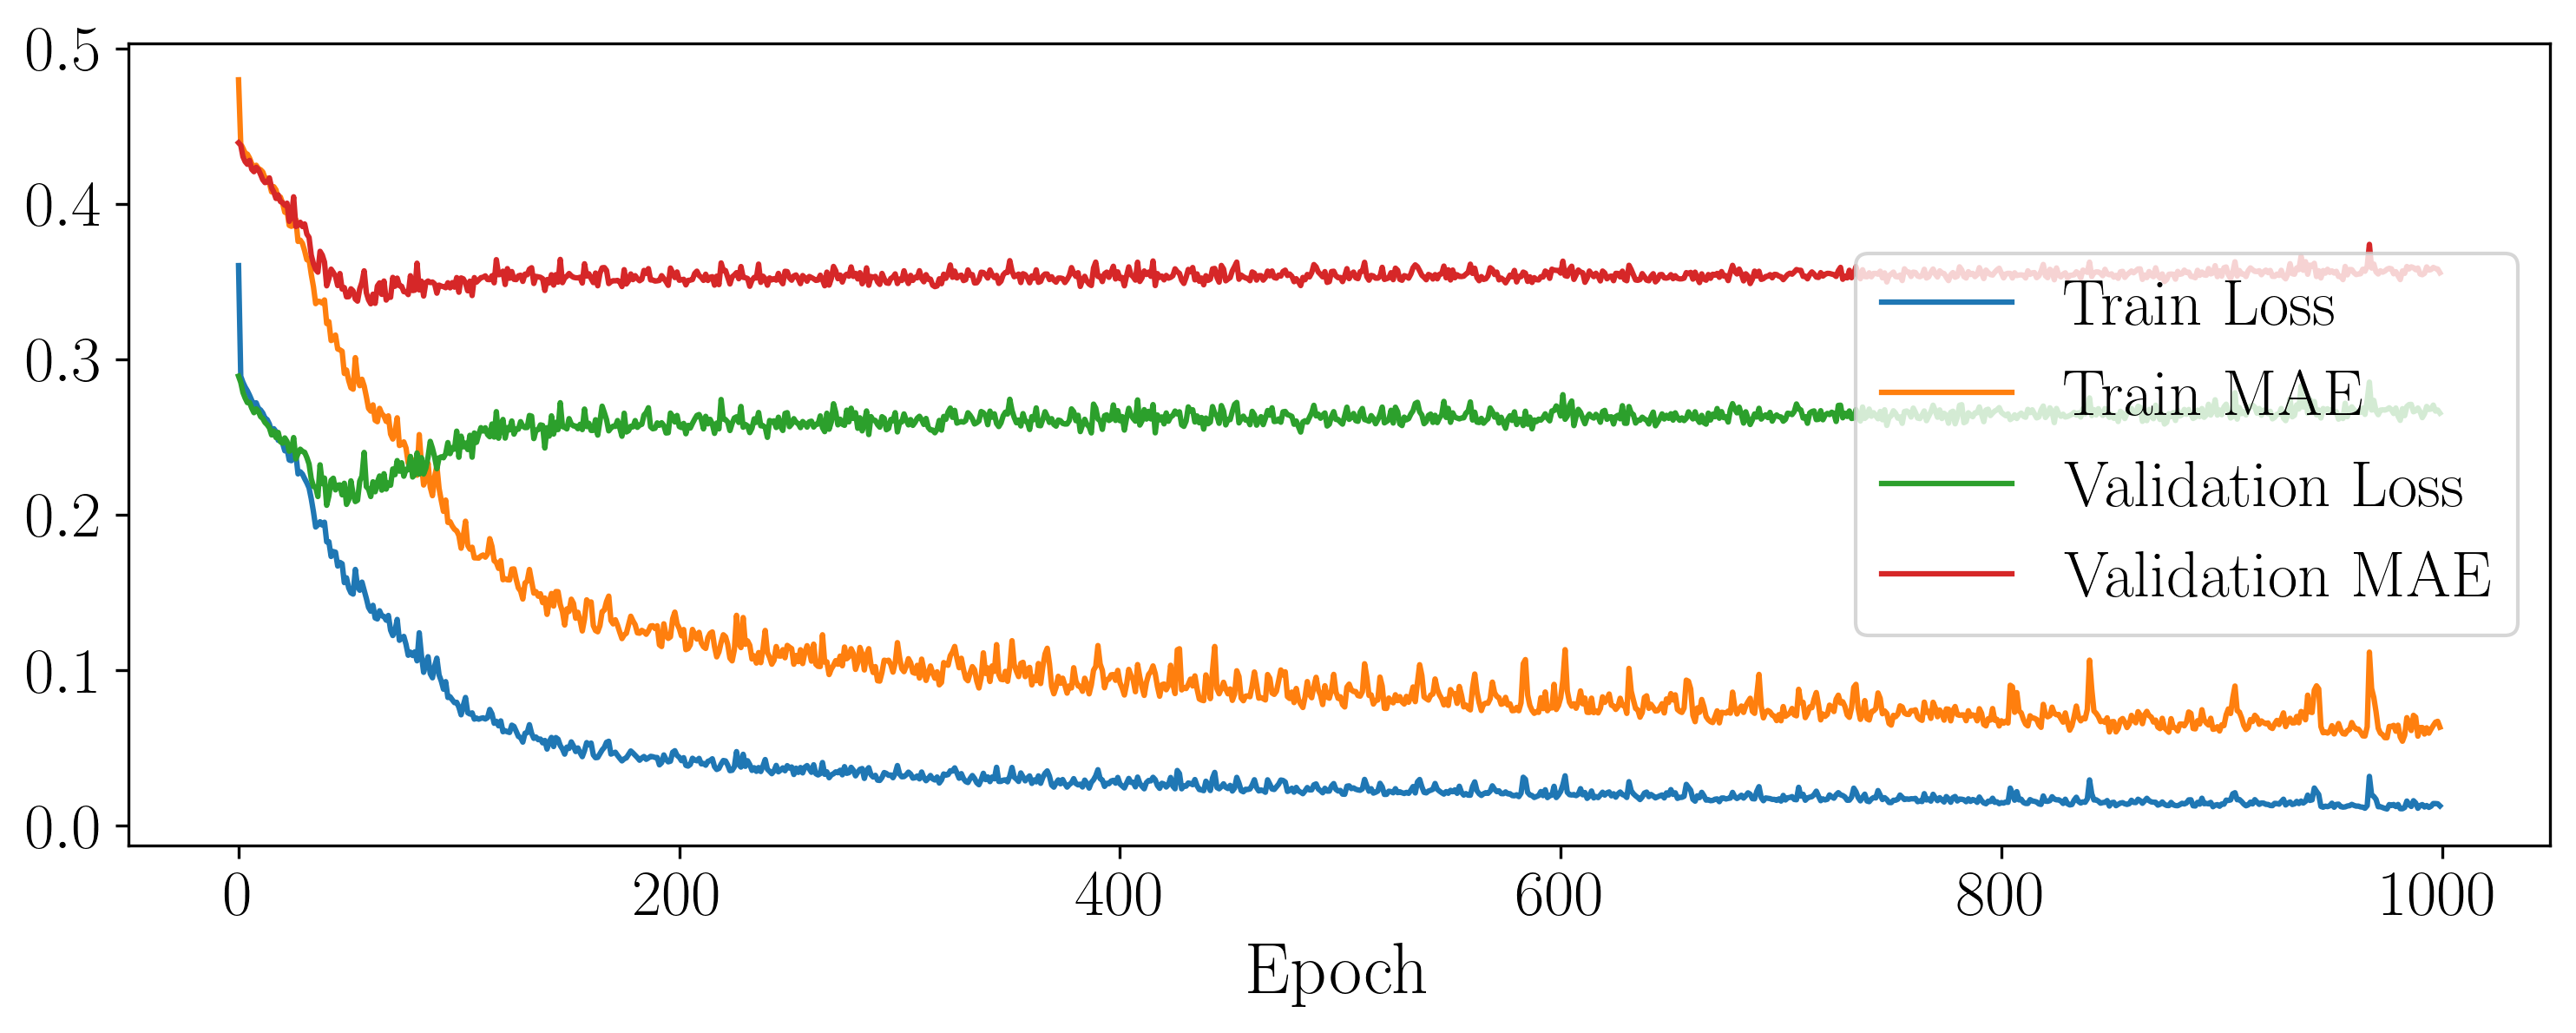

In [12]:
model =  Dense_five()

#Fiteamos el modelo
history = model.fit(x_train_norm, y_train_norm, batch_size=batch_size, validation_data=(x_val_norm, y_val_norm),
                     epochs=epochs, verbose=2)

# # Definir EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Guardamos el modelo y así no necesitamos entrenarlo cada vez que lo queramos usar
model.save('model_Noise.keras') 

# Visualiza la pérdida y la métrica de entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Llamamos y evaluamos

In [13]:
#LLamamos al modelo
model = models.load_model("model_Noise.keras")
#model.summary()

#Evaluamos el modelo
scores = model.evaluate(x_test_norm, y_test_norm, verbose=0)
print('MSE:',scores[0],'\nMAE:', scores[1])  


#Predecimos los valores con nuestro modelo
y_pred_norm = model.predict(x_test_norm)

MSE: 0.2620674669742584 
MAE: 0.353231281042099
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Dibujamos los resultados

##### Predicción de cada parámetro

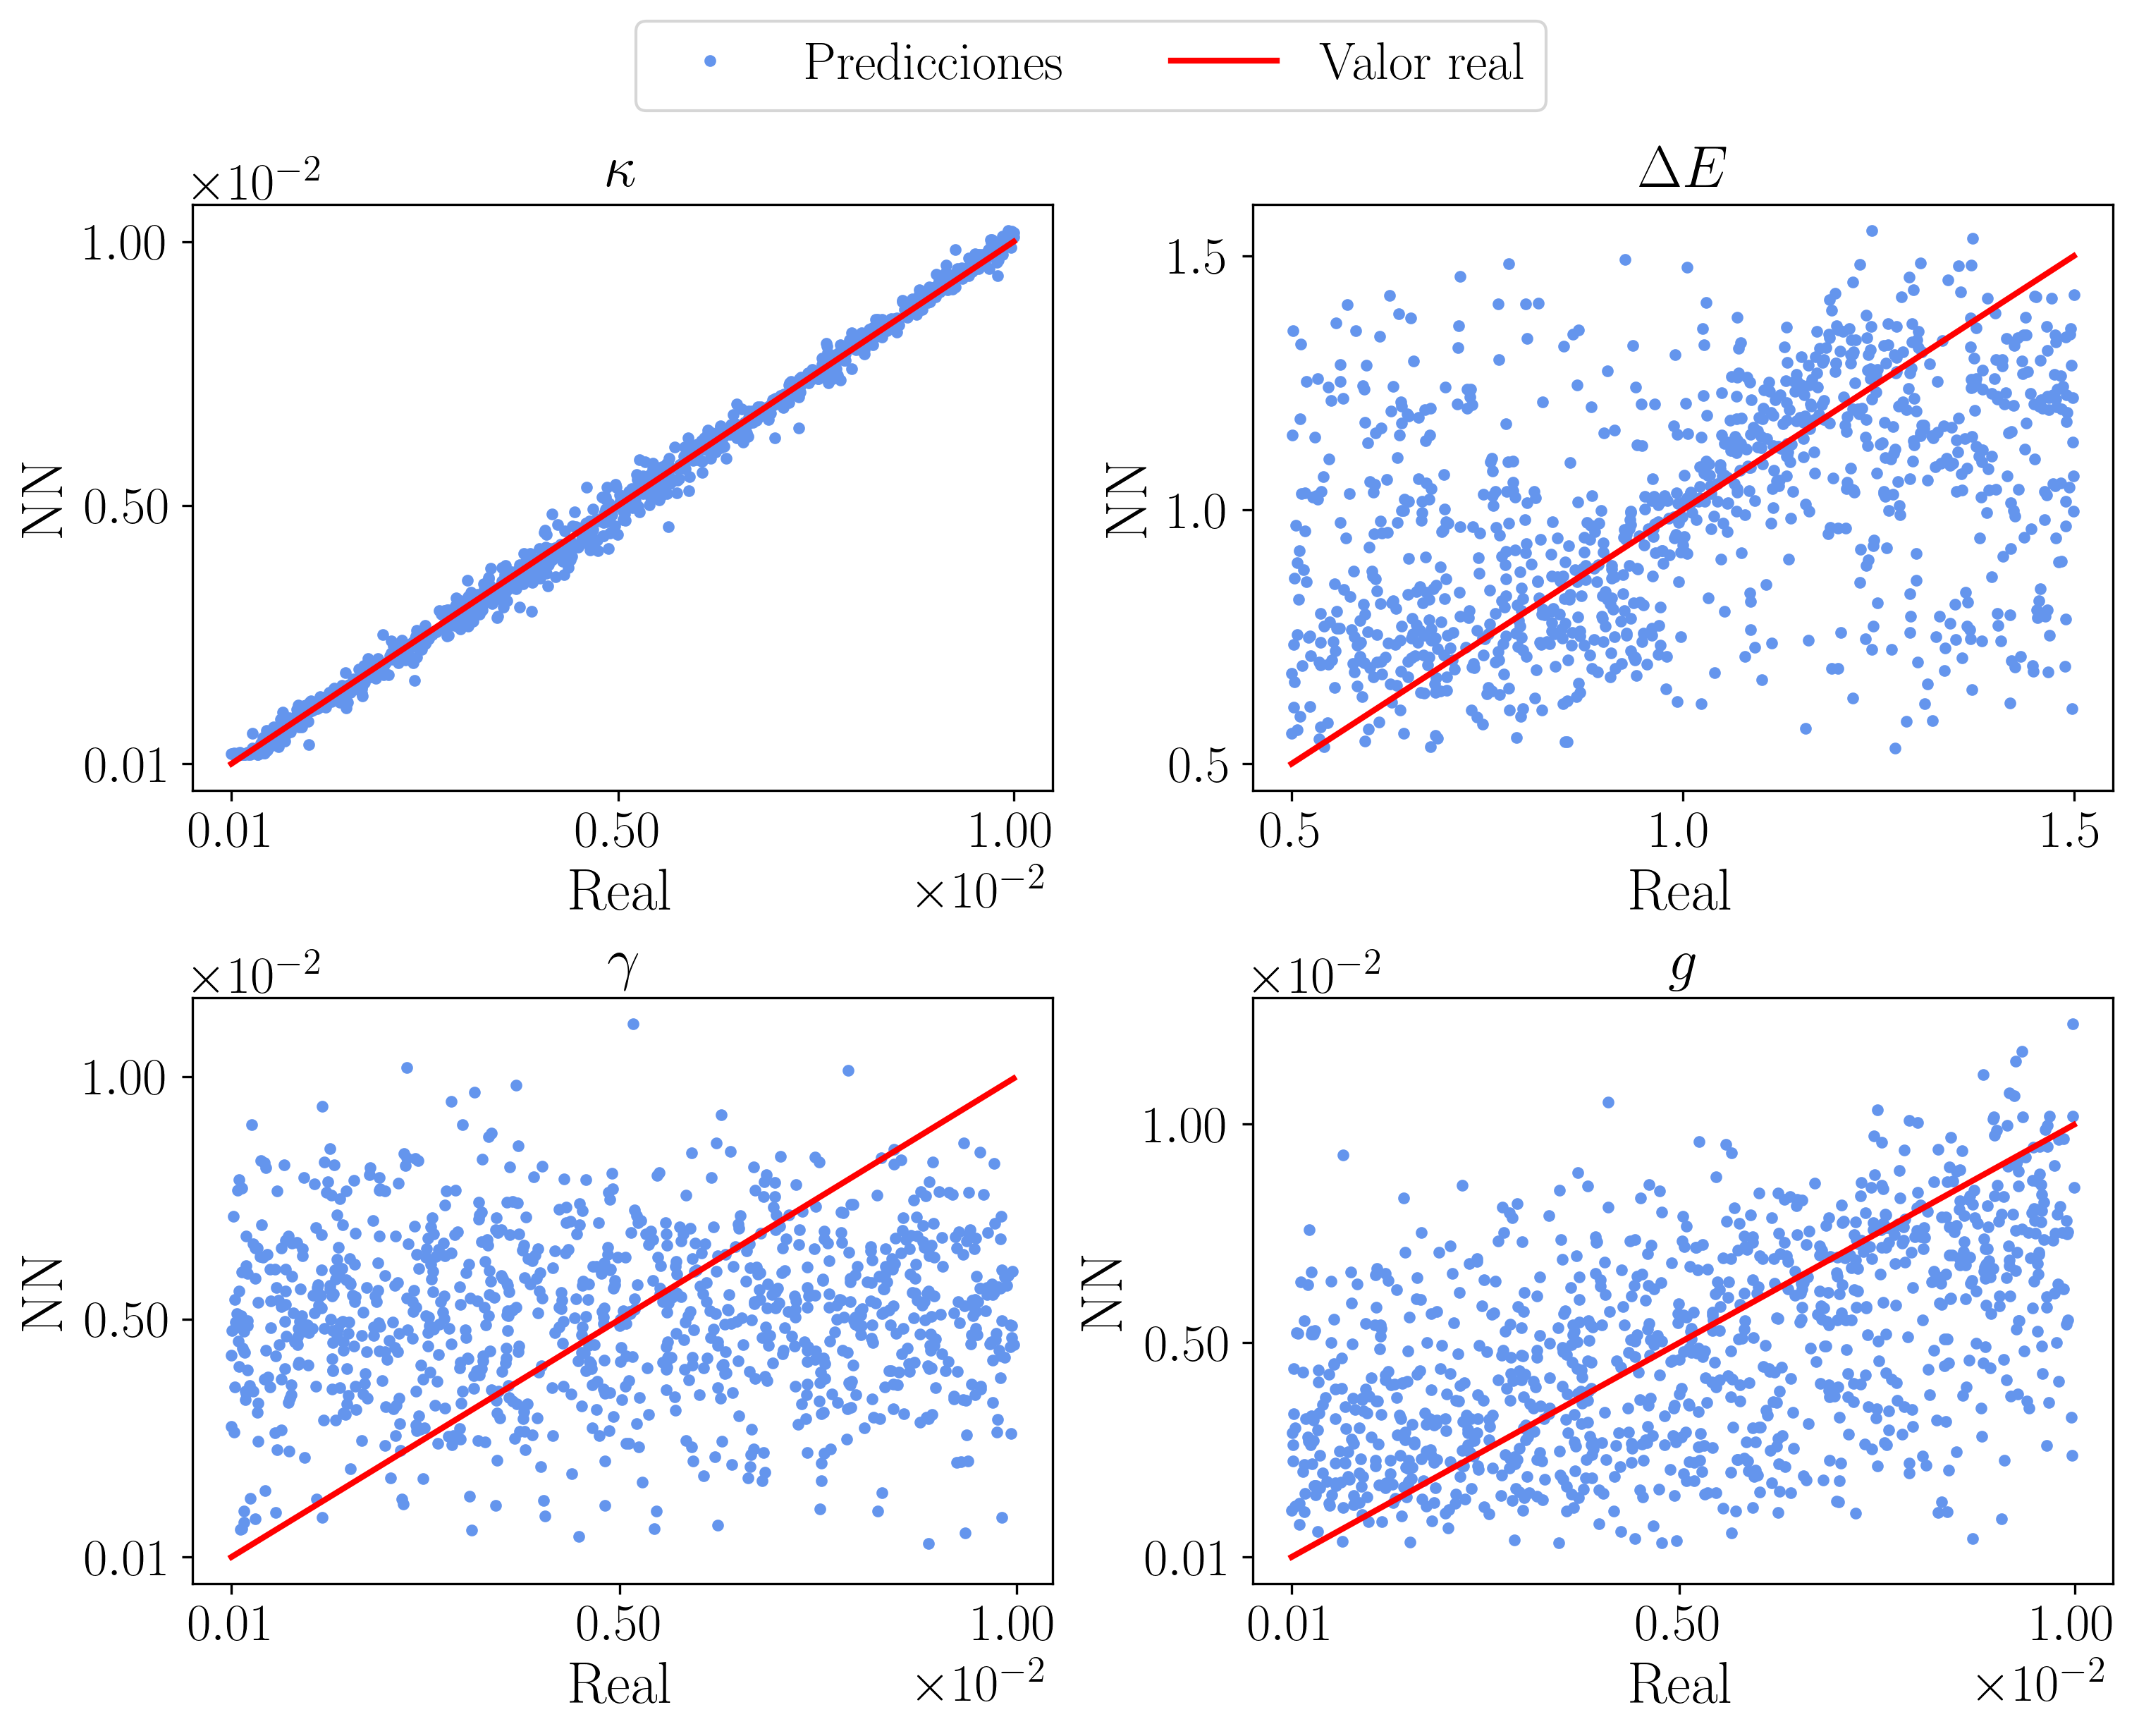

In [14]:
# Desnormalizamos los datos de salida de validación
y_test_denorm = scaler_y.inverse_transform(y_test_norm)
y_pred_denorm = scaler_y.inverse_transform(y_pred_norm)

# Dibujamos los datos
symbols = [r'$\kappa$', r'$\Delta E$', r'$\gamma$', r'$g$']

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [10,7.5], 
    "figure.dpi": 300 
})

# Crear subgráficos para cada variable
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

# Añadir los subgráficos
for i, ax in enumerate(axes.flatten()):
    if i < y_test_denorm.shape[1]:  # Verifica que no exceda el número de columnas en los datos
        ax.plot(y_test_denorm[:, i], y_pred_denorm[:, i], marker='o', linestyle='',
                markersize=3, color='cornflowerblue')
        ax.plot([y_test_denorm[:, i].min(), y_test_denorm[:, i].max()],
                [y_test_denorm[:, i].min(), y_test_denorm[:, i].max()], linestyle='-', color='red', linewidth=2 )
        ax.set_xlabel('Real')
        ax.set_ylabel('NN')
        ax.set_title(symbols[i]) 

        if i == 1:  # Índice 1 corresponde a Delta E
            ticks = [0.5, 1.0, 1.5]
        else:
            ticks = [1e-4, 5e-3, 1e-2]

        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        
        # Aplicar notación científica a los ejes
        if i != 2:  # Índice 2 corresponde a Delta E
            ax.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
        else:
            ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

labels = ["Predicciones", "Valor real"]
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.51, 1.09), ncol=2)

plt.show()


##### Curvas Validación VS Predicción

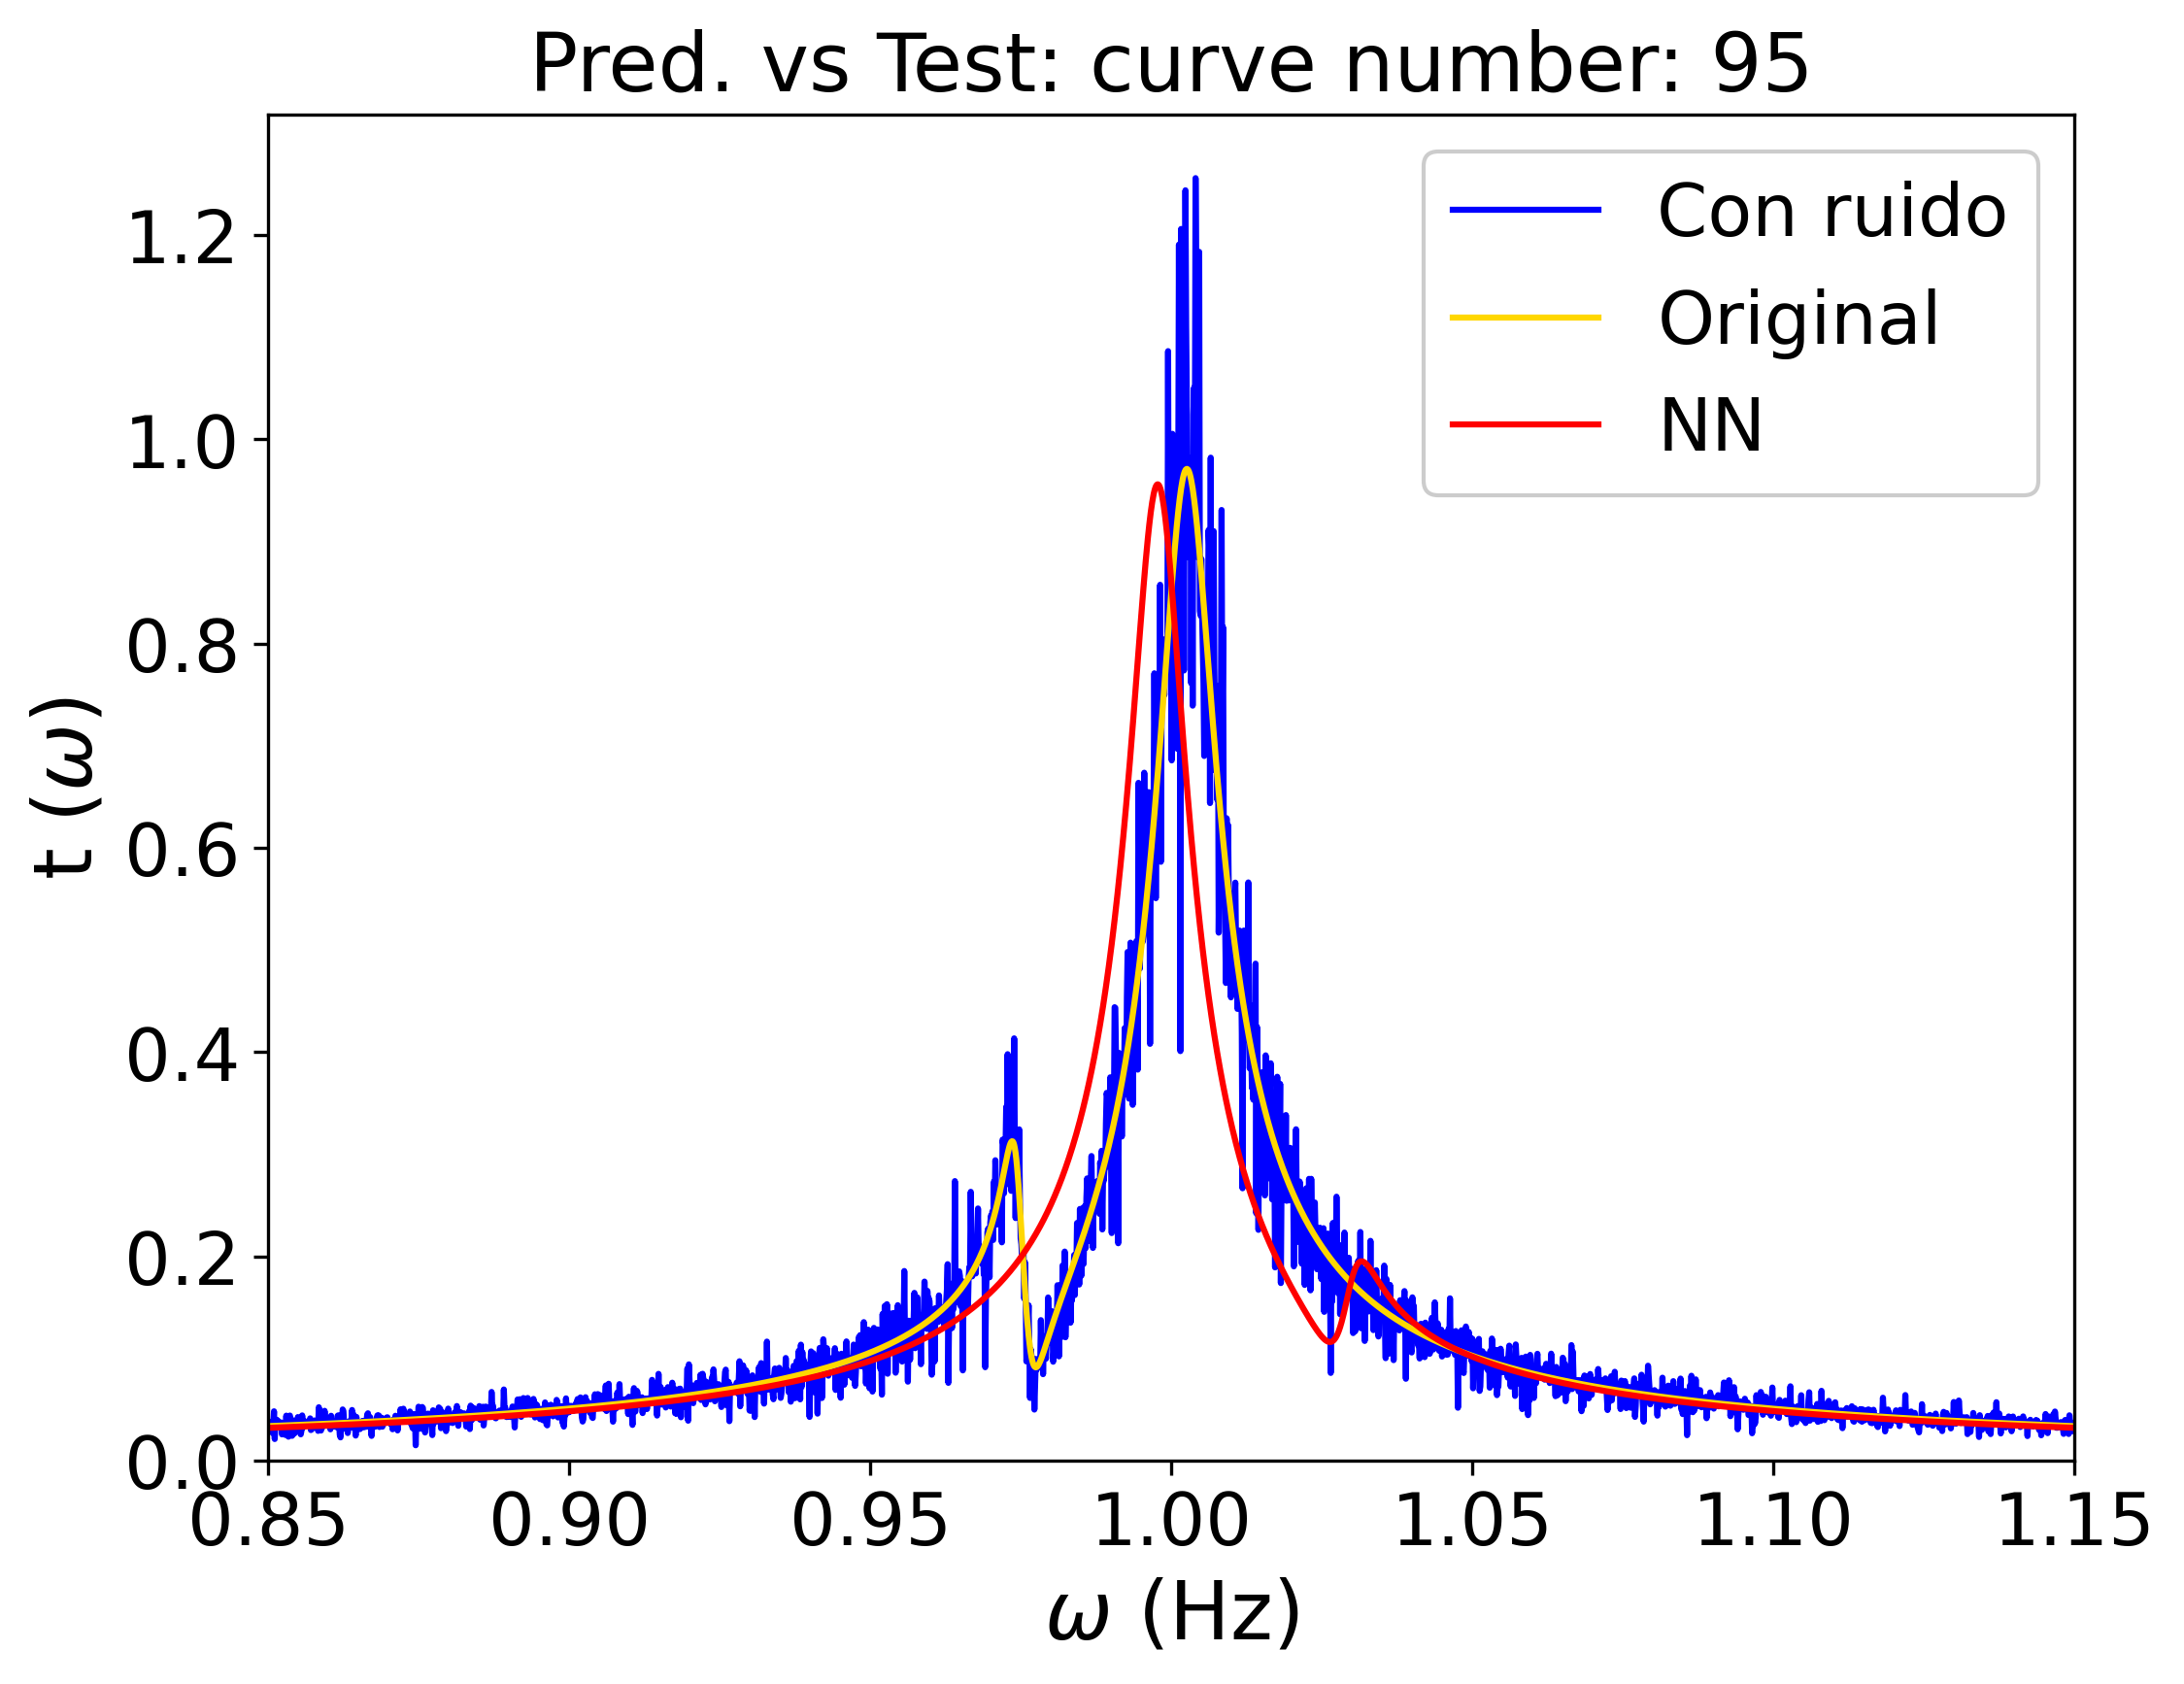

In [19]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ['DejaVu Sans'],
}) # Para visualizar LaTeX es muy lento (cuando sepa cual gráfica guaradr, se hará con latex)

k_pred = y_pred_denorm[:, 0]
k_test = y_test_denorm[:, 0]
DeltaE_pred = y_pred_denorm[:, 1]
DeltaE_test = y_test_denorm[:, 1]
gamma_pred = y_pred_denorm[:, 2]
gamma_test = y_test_denorm[:, 2]
g_pred = y_pred_denorm[:, 3]
g_test = y_test_denorm[:, 3]

t_values_pred = np.zeros((x_val.shape[0], len(w_values)))
t_values_test_noise = t_values_noise[indices_test]
t_values_test = t_values[indices_test]


for i in range (x_val.shape[0]):
    t_values_pred[i,:] = t_w(w_values, k_pred[i], Omega, DeltaE_pred[i], gamma_pred[i], g_pred[i])

# w1 = w2 = np.zeros(x_val.shape[0])

# w1=w_1(k_test, Omega, DeltaE_test, gamma_test, g_test)
# w2=w_2(k_test, Omega, DeltaE_test, gamma_test, g_test)

plt.rcParams.update({
    "text.usetex": False,
    "figure.figsize": [8,6], 
})

i = 0
while i < x_val.shape[0]:
    plt.clf()  # Limpia la figura antes de cada iteración
    plt.plot(w_values, t_values_test_noise[i, :], color="b", label="Con ruido")
    plt.plot(w_values, t_values_test[i, :], color="gold", label="Original")
    plt.plot(w_values, t_values_pred[i, :], color="r", label="NN")
    
    # # Calcula los valores de t(w) en w1 y w2
    # t_w1 = t_w(w1[i], k_test[i], Omega, DeltaE_test[i], gamma_test[i], g_test[i])
    # t_w2 = t_w(w2[i], k_test[i], Omega, DeltaE_test[i], gamma_test[i], g_test[i])
    
    # if w_values.min() <= w1[i] <= w_values.max():
    #     plt.vlines(w1[i], 0, t_w1, colors='black', linewidth=0.5)
    # if w_values.min() <= w2[i] <= w_values.max():
    #     plt.vlines(w2[i], 0, t_w2, colors='black', linewidth=0.5)
   
    plt.title(f"Pred. vs Test: curve number: {i}")
    plt.xlabel(r"$\omega$ (Hz)")
    plt.ylabel(r"t ($\omega$)")
    plt.legend(framealpha=1)
    plt.ylim(0) 
    plt.xlim(0.85, 1.15) 

    # Muestra los valores como un recuadro dentro de la gráfica
    text = f"$\kappa$ real = {k_test[i]:.2e}, $\kappa$ pred = {k_pred[i]:.2e}\n"\
           f"$\Delta$E real = {DeltaE_test[i]:.3f}, $\Delta$E pred = {DeltaE_pred[i]:.3f}\n"\
           f"$\gamma$ real = {gamma_test[i]:.2e}, $\gamma$ pred = {gamma_pred[i]:.2e}\n"\
           f"g real = {g_test[i]:.2e}, g pred = {g_pred[i]:.2e}"
    # plt.text(0.011, 0.95, text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', 
    #          bbox=dict(facecolor='white', alpha=1))

    # Muestra la figura
    display(plt.gcf())
    clear_output(wait=True)
    
    if keyboard.is_pressed('esc'): 
        break
    if keyboard.is_pressed('right'): 
        i += 1
    if keyboard.is_pressed('left'): 
        i -= 1       
        if i < 0:
            i += 1



# Dibujos para Memoria

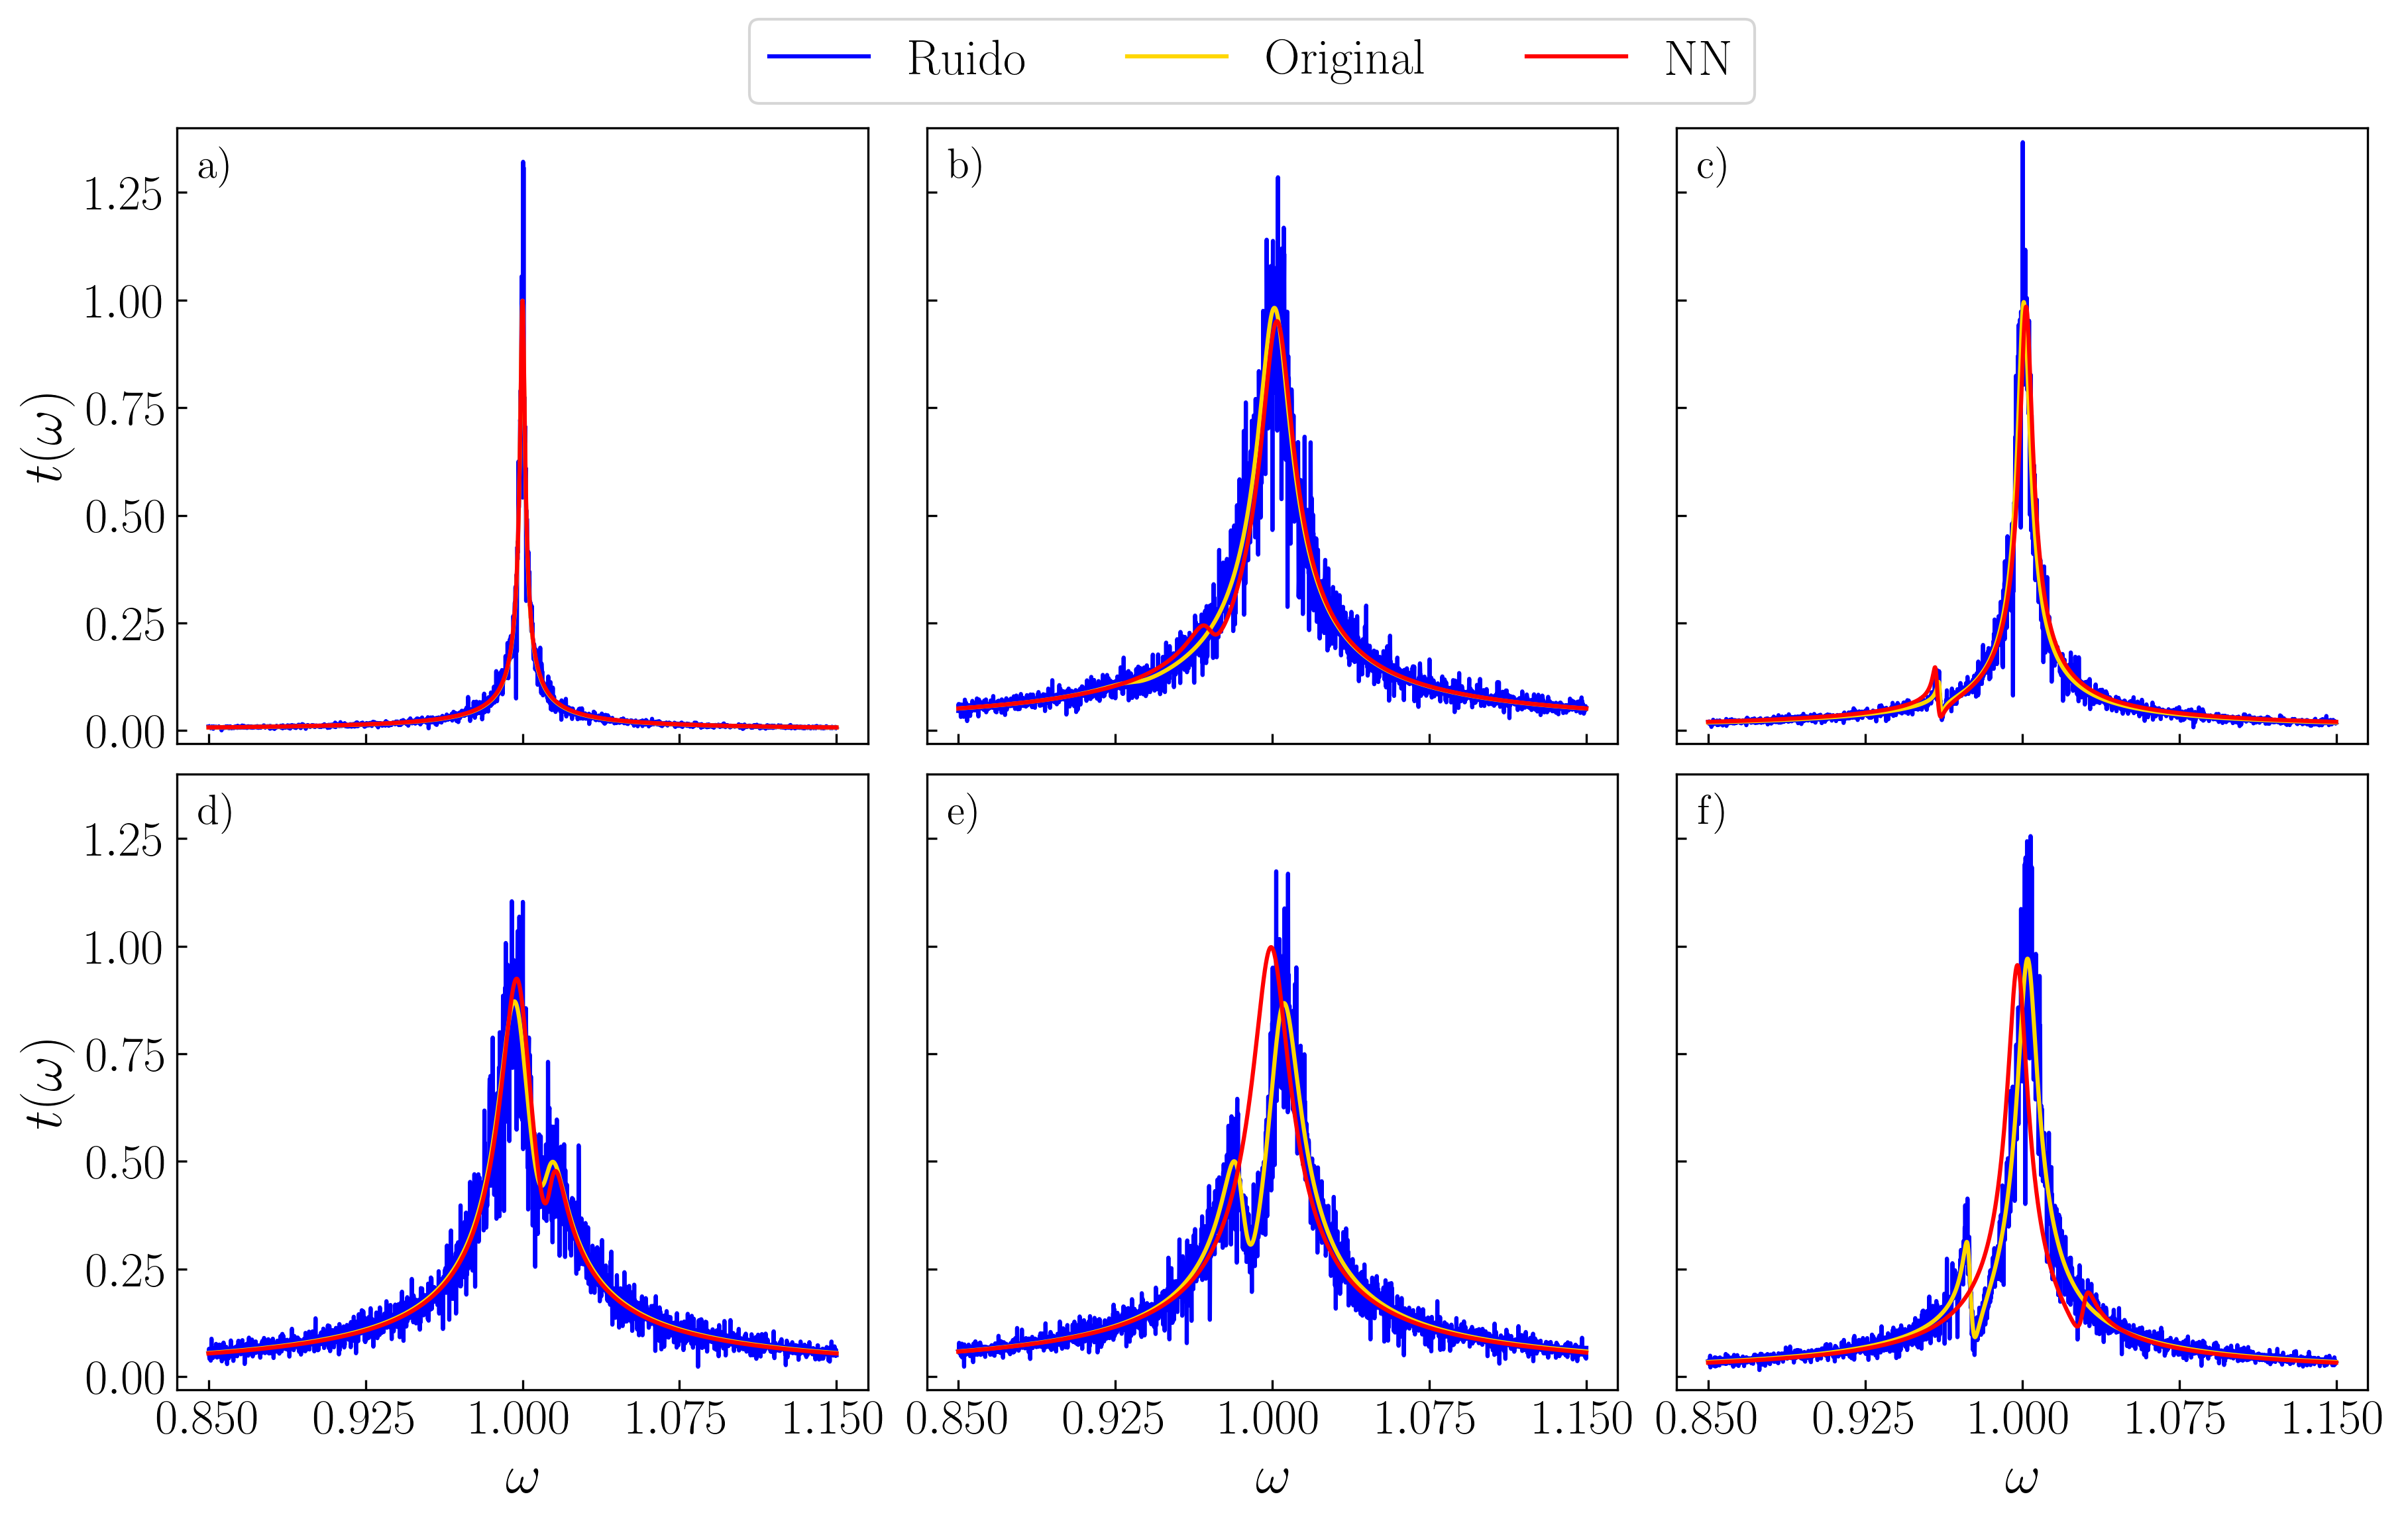

In [22]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12, 7], 
    "figure.dpi": 300 
})


pics = [0,4,6,16,29,95]
labels_subplots = ["a)", "b)", "c)", "d)", "e)", "f)"]

fig, axes = plt.subplots(2, 3, constrained_layout=True)
for idx, (ax, i) in enumerate(zip(axes.flat, pics)):
    ax.plot(w_values, t_values_test_noise[i, :], color="b")
    ax.plot(w_values, t_values_test[i, :], color="gold")
    ax.plot(w_values, t_values_pred[i, :], color="r")
    ax.set_yticks(np.arange(0, 1.4, 0.25))
    ax.set_xticks(np.linspace(w_values.min(), w_values.max(), 5))
    ax.set_ylim(-0.03, 1.4)

    ax.text(0.03, 0.97, labels_subplots[idx], transform=ax.transAxes, 
        fontsize=15, fontweight='bold', va='top', ha='left')

    # Configurar etiquetas y ticks según la posición del subplot
    if idx % 3 == 0:  # Primera columna
        ax.set_ylabel(r'$t(\omega)$')  # Etiqueta y en la columna izquierda
    else:
        ax.set_yticklabels([])  # Sin etiquetas en el eje y en la columna derecha
        ax.tick_params(axis='y', labelleft=False)

    if idx // 3 == 1:  # Última fila
        ax.set_xlabel(r'$\omega$')  # Etiqueta x en la fila inferior
    else:
        ax.set_xticklabels([])  # Sin etiquetas en el eje x en la fila superior
        ax.tick_params(axis='x', labelbottom=False)

    ax.tick_params(axis='both', direction='in')


labels = ['Ruido', "Original", "NN"]
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.52, 1.09), ncol=3)
plt.show()